In [266]:
#importing everything that is used throughout this notebook
import numpy as np
import pandas as pd

In [267]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from mpl_toolkits.basemap import Basemap
%config InlineBackend.figure_format = 'retina'
from matplotlib.colors import Normalize

In [268]:
#Allows warnings to be ignored 

import warnings
warnings.filterwarnings('ignore')

In [269]:
data = pd.read_csv('data/AviationDataEnd2016UP.csv',encoding = "ISO-8859-1")

In [270]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20170103X43747,Accident,WPR17LA046,03/01/2017,"Paradise, MT",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,2.0,NaN,NaN,VMC,CRUISE,Preliminary,05/01/2017
1,20161230X55950,Accident,WPR17FA044,29/12/2016,"Dabob, WA",United States,47.823611,-122.790000,NaN,NaN,...,Personal,NaN,4.0,NaN,NaN,NaN,VMC,NaN,Preliminary,05/01/2017
2,20161229X93022,Accident,CEN17LA062,27/12/2016,"Piedmont, MO",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Preliminary,03/01/2017
3,20161227X80237,Accident,CEN17LA061,27/12/2016,"Farmington, MO",United States,37.761111,-90.428611,FAM,FARMINGTON RGNL,...,Personal,NaN,NaN,NaN,1.0,1.0,VMC,TAKEOFF,Preliminary,29/12/2016
4,20161226X80840,Accident,WPR17FA041,26/12/2016,"Fresno, CA",United States,36.844444,-119.870834,E79,Sierra Sky Park,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,05/01/2017
5,20161227X03229,Accident,ERA17FA073,26/12/2016,"Gatlinburg, TN",United States,35.651944,-83.458333,GKT,GATLINBURG-PIGEON FORGE,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,DESCENT,Preliminary,03/01/2017
6,20161223X22808,Accident,ERA17FA072,23/12/2016,"Middlebury, VT",United States,43.981389,-73.094444,6B0,MIDDLEBURY STATE,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,04/01/2017
7,20161221X11609,Incident,ENG17WA007,21/12/2016,"Toronto, Canada",Canada,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,224.0,NaN,TAKEOFF,Foreign,NaN
8,20161222X21701,Accident,CEN17LA060,21/12/2016,"Millersburg, OH",United States,40.536666,81.955833,10G,Holmes County,...,Personal,NaN,NaN,NaN,1.0,1.0,VMC,APPROACH,Preliminary,27/12/2016
9,20161220X20645,Accident,CEN17LA058,18/12/2016,"Blaine, MN",United States,45.195555,-93.162778,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,05/01/2017


In [271]:
# Checks for any unusable values within the dataset (Useful when trying to formulate graphical results)

nullcolumns = data.columns[data.isnull().any()] # Renames the variables/null columns within the dataset 

data.isnull().sum() # Shows the amount of missing and unusable values within the dataset

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     78
Country                     507
Latitude                  53542
Longitude                 53551
Airport.Code              34627
Airport.Name              31854
Injury.Severity               0
Aircraft.Damage            2410
Aircraft.Category         56816
Registration.Number        3084
Make                         89
Model                       118
Amateur.Built               572
Number.of.Engines          4118
Engine.Type                3374
FAR.Description           56959
Schedule                  67792
Purpose.of.Flight          3894
Air.Carrier               75375
Total.Fatal.Injuries      23309
Total.Serious.Injuries    25551
Total.Minor.Injuries      24460
Total.Uninjured           12344
Weather.Condition          2157
Broad.Phase.of.Flight      6054
Report.Status                 0
Publication.Date          13474
dtype: i

In [272]:
data['Date'] = pd.to_datetime(data['Event.Date'])

data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

(array([  0.00000000e+00,   1.00000000e+00,   3.59300000e+03,
          3.55600000e+03,   3.45700000e+03,   3.09600000e+03,
          2.88000000e+03,   2.82800000e+03,   2.73000000e+03,
          2.54400000e+03,   2.51800000e+03,   2.46200000e+03,
          2.35400000e+03,   2.31300000e+03,   2.25700000e+03,
          2.30900000e+03,   2.18700000e+03,   2.14800000e+03,
          2.22600000e+03,   2.20900000e+03,   2.22000000e+03,
          2.06300000e+03,   2.02000000e+03,   2.08500000e+03,
          1.95200000e+03,   2.03100000e+03,   1.85100000e+03,
          2.01600000e+03,   1.93100000e+03,   1.80500000e+03,
          1.81800000e+03,   1.88600000e+03,   1.86000000e+03,
          1.55500000e+03,   1.53900000e+03,   1.57800000e+03,
          1.40900000e+03,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([ 1980.,  1981.,  1982.,  1983.,  1984.,  1985.,  1986.,  1987.,
         1988.,  1989.,  1990.,  1991.,  1992.,  1993.,  1994.,  1995.,
         1996.,  1997.

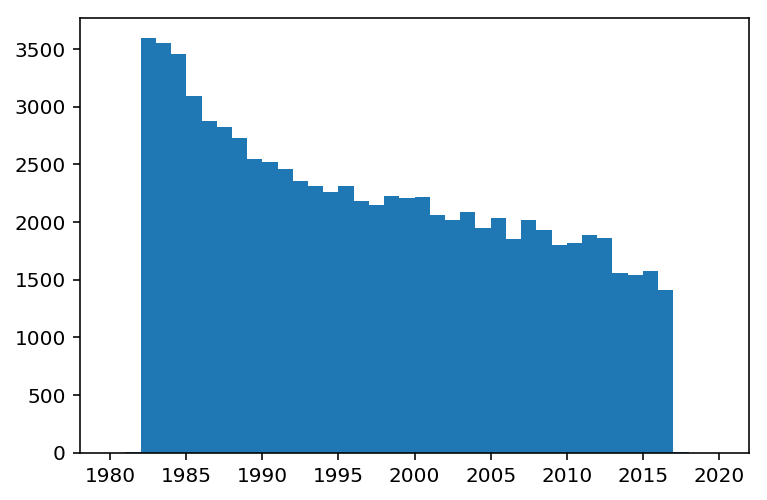

In [273]:
#this shows the number of crashes in relation to the year.
plt.hist(data['Year'],bins=40,range=(1980,2020))

This graph  

(array([ 5505.,  5432.,  6272.,  6601.,  7543.,  7971.,  8384.,  7958.,
         6781.,  6202.,  5342.,  5302.]),
 array([  1.        ,   1.91666667,   2.83333333,   3.75      ,
          4.66666667,   5.58333333,   6.5       ,   7.41666667,
          8.33333333,   9.25      ,  10.16666667,  11.08333333,  12.        ]),
 <a list of 12 Patch objects>)

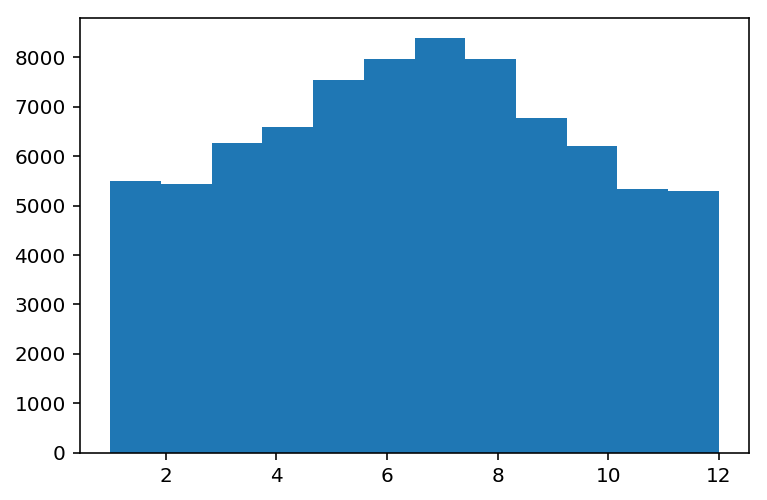

In [274]:
#this shows the number of crashes in relation to the month of the year.
plt.hist(data['Month'],bins=12,range=(1,12))

In [275]:
group_year = data.groupby('Year').agg([sum])

In [276]:
yearfatal = group_year['Total.Fatal.Injuries']
yearfatal

,sum
Year,
1948,2.0
1962,4.0
1974,3.0
1977,2.0
1979,1.0
1981,4.0
1982,1585.0
1983,1273.0
1984,1229.0


This is a table of the number of fatalities by year. For some reason I couldn't work out how to get this to plot as a hist and therefore this is something that I would like to acheive in the next submision. 

In [277]:
yearlyoccurrence = data.groupby("Year").groups

#data before 1982 seems unreliable as only sigle crashes have been recorded in these years. And there is only one piece of data for 2017.
year = [i for i in range(1982,2017)]
occurrence = []

for i in range(len(year)):
    val = yearlyoccurrence[year[i]]
    occurrence.append(len(val))

# This returns the values for the max, min and average occurrence of earthquakes per year

print("Minimum:",np.min(occurrence))
print("Maximum:",np.max(occurrence))
print('Average:',np.mean(occurrence))

from scipy import stats

iqr = stats.iqr(occurrence)
upper = np.mean(occurrence) + iqr/2
lower = np.mean(occurrence) - iqr/2

Minimum: 1409
Maximum: 3593
Average: 2265.31428571


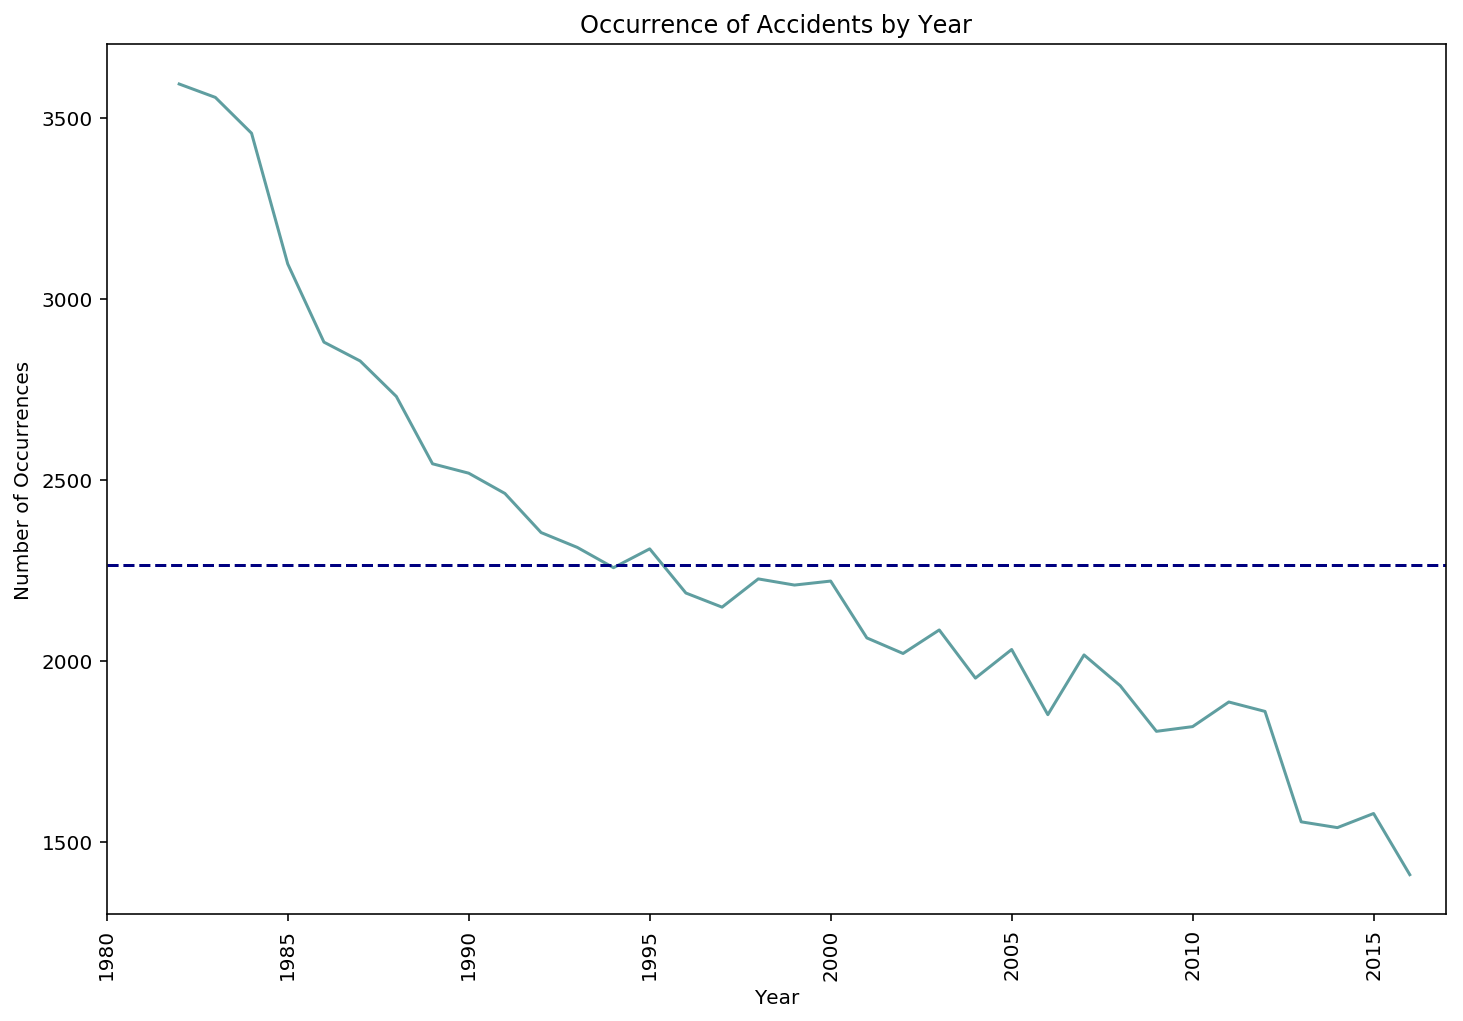

In [278]:
fig = plt.figure(figsize=(12,8))
plt.plot(year,occurrence,'cadetblue')
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.title("Occurrence of Accidents by Year")
plt.xlim(1980,2017)

# Plots a horizontal line with the average occurence of Accidents yearly

plt.axhline(y=np.mean(occurrence),color='navy', linestyle='--')

plt.show()

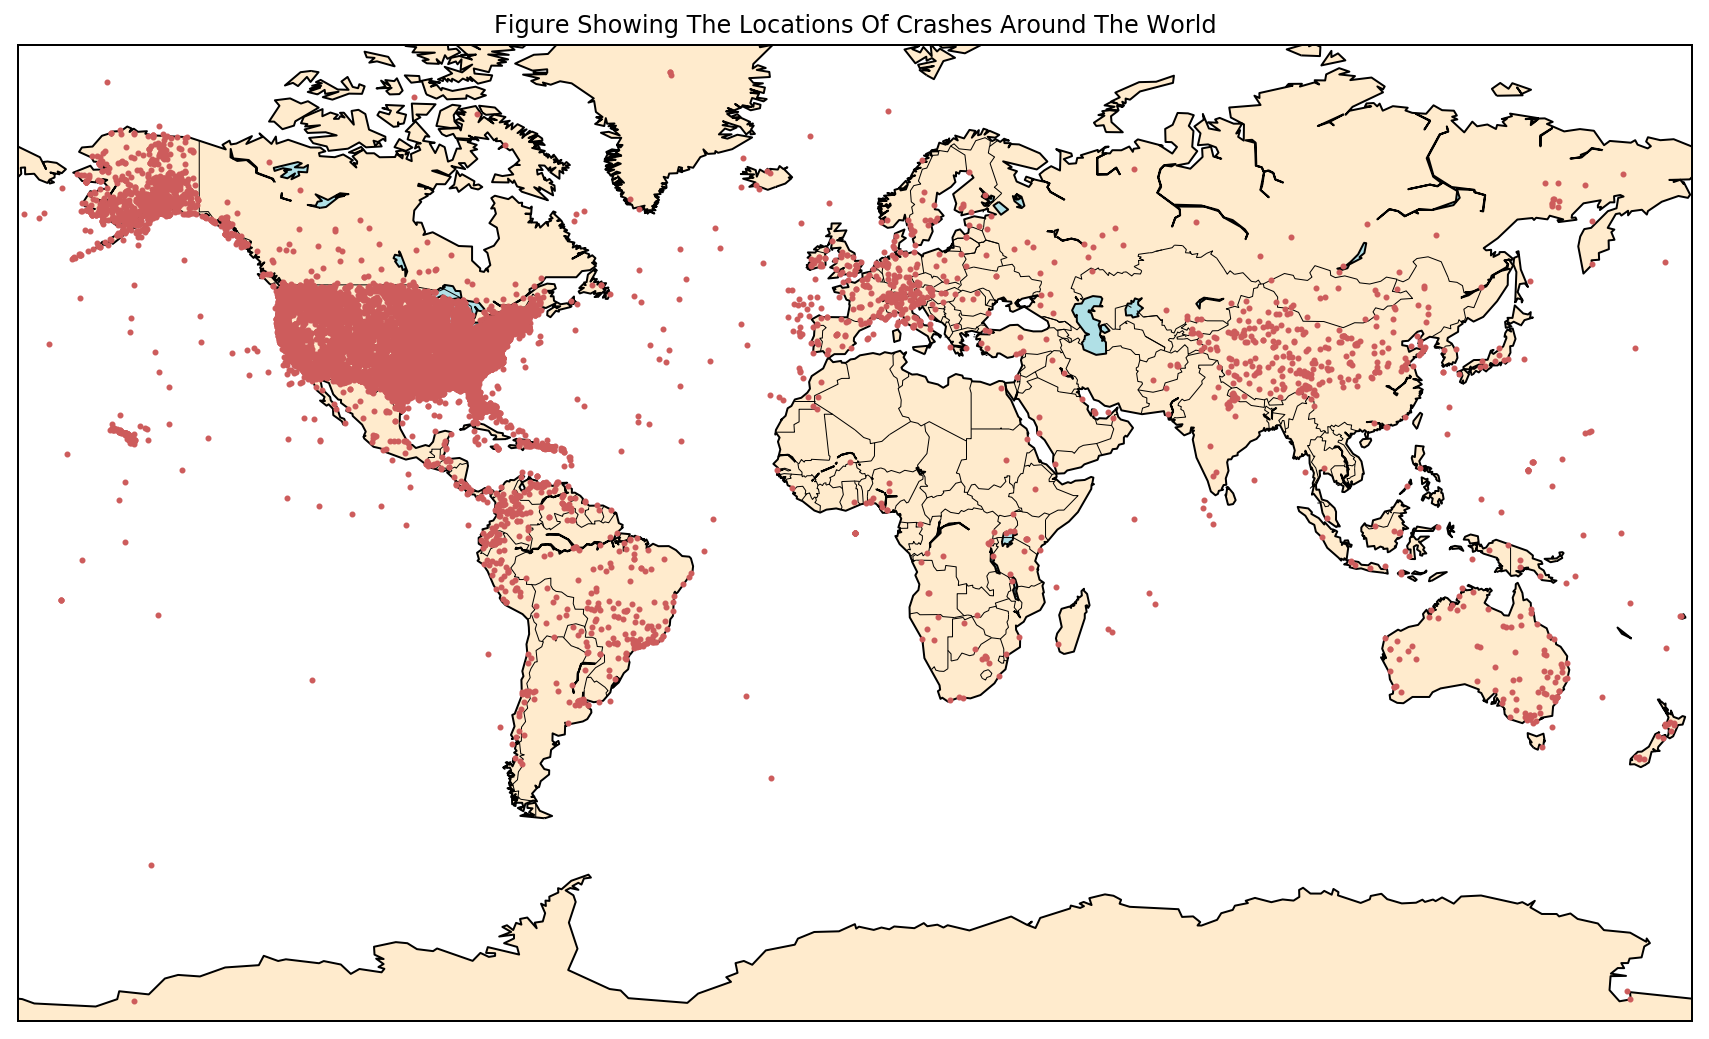

In [279]:
# This plots the locations of all of the earthquakes around the world (Using Basemap)

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
    
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(15,12))
plt.title("Figure Showing The Locations Of Crashes Around The World")
m.plot(x, y, "o", markersize = 2, color = 'indianred')
m.drawcoastlines()
m.fillcontinents(color='blanchedalmond',lake_color='powderblue')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [280]:
for i in range(1985, 2017):
    locals()['data'+str(i)] = data[data["Year"]==i]

From these maps it is kind of apparent that crashes occure more frequently over the USA. But its not very clear. Also thuis doesn't give any information about the number of flights, if more happen across the states this can no be seen as a defining factor.

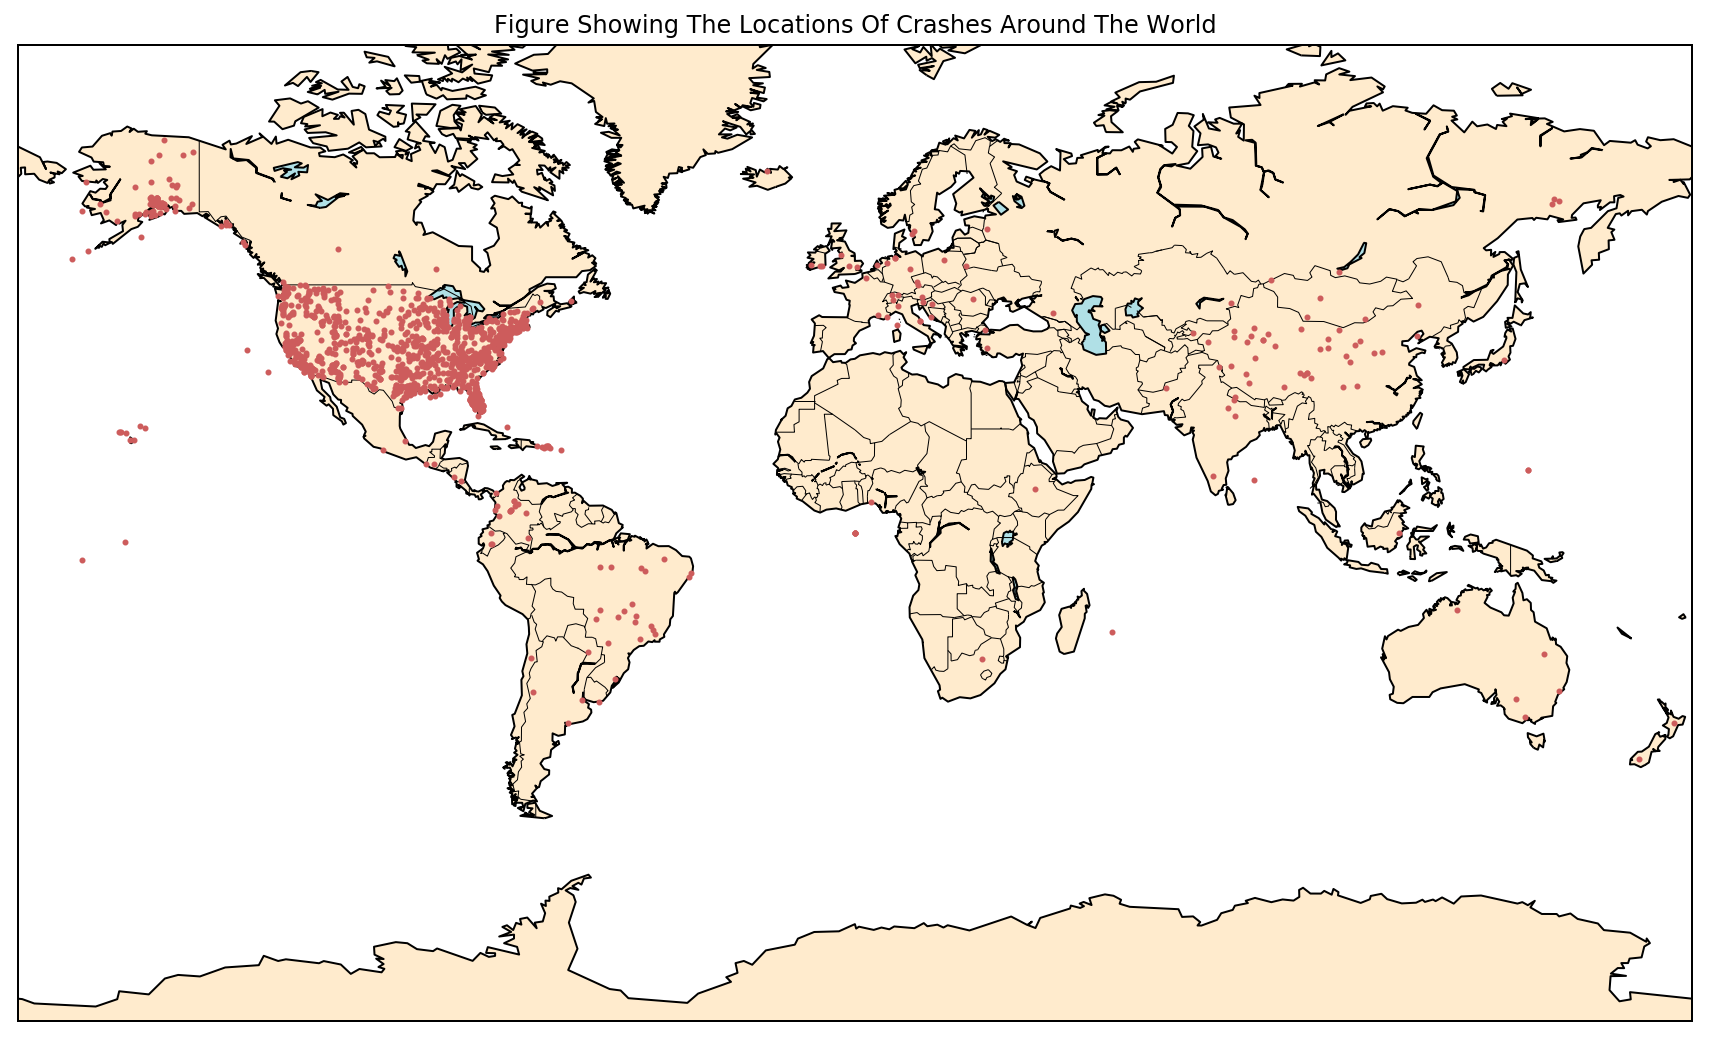

In [281]:
# This plots the locations of all of the Acidents around the world (Using Basemap) for specific years.

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data2015["Longitude"].tolist()
latitudes = data2015["Latitude"].tolist()
    
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(15,12))
plt.title("Figure Showing The Locations Of Crashes Around The World")
m.plot(x, y, "o", markersize = 2, color = 'indianred')
m.drawcoastlines()
m.fillcontinents(color='blanchedalmond',lake_color='powderblue')
m.drawmapboundary()
m.drawcountries()
plt.show()

This map allows you to select a sepecifc year to inverstergate, I want to take this further using trinket allowing the user to use a drop down or a button to select the year that they are investergating. This can then be combined with other graphs to creat a data sheet that changes with the years.

In [282]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace0 = go.Scatter(
    x = year, 
    y = occurrence,
    name='Occurrence Of Acidents',
    line=dict(color='rgb(112, 138, 144)',))

data = [trace0]

layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Occurrence Of Acidents'),
    title='Global Occurrence Of Acidents Over Time',
    showlegend = True)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

This was just a look at creating an interactive version of a previous graph.

### Conclusion
From this data it can been see that there has been a significant reduction in the number of crashes of time. This also realates to the reduction in fatalties. In the future it will be interesting to explore the weather and the manufactures influence on this data. Then combine all of this information in to one easy to read sheet that is interactive so that users can look at specific years.